(409.0, 72.0, 825.0, 488.0)


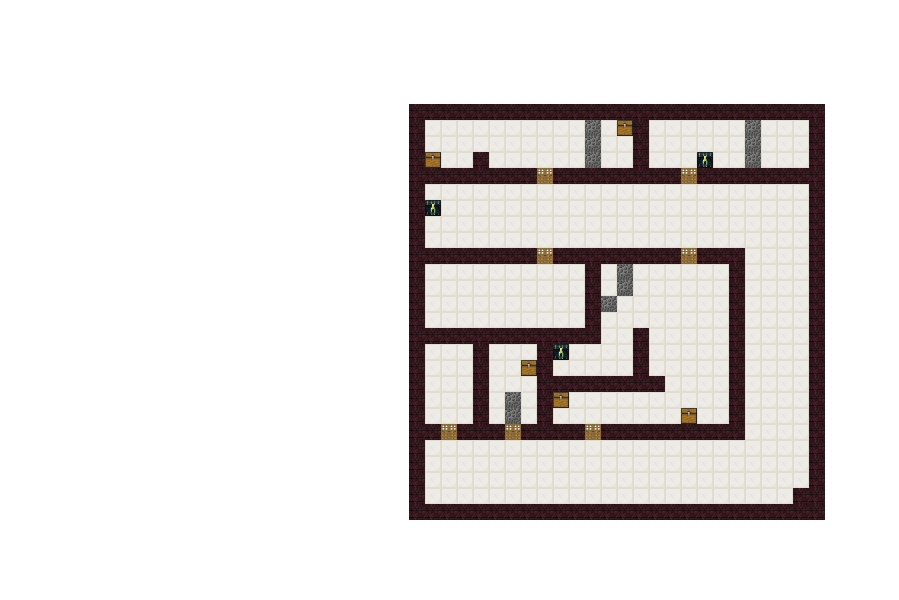

In [3]:
from PIL import Image

WINDOW_WIDTH = 900
WINDOW_HEIGHT = 600
MAZE_HOR_OFFSET = 140
MAZE_VER_OFFSET = 0

# x_min = -2
# y_min = -2
# x_max = 3
# y_max = 3
# ts = 60
x_min = -10
y_min = -12
x_max = 13
y_max = 11
ts = 16

# print((-40-30+450+3, -180+300-90+4, 440+450-30+3, 300+300-90+4))

left = MAZE_HOR_OFFSET+(x_min-1.5)*ts + WINDOW_WIDTH/2 + 3
top = MAZE_VER_OFFSET+(y_min-2.5)*ts + WINDOW_HEIGHT/2 + 4
right = MAZE_HOR_OFFSET+(x_max+1.5)*ts + WINDOW_WIDTH/2 + 3
bottom = MAZE_VER_OFFSET+(y_max+0.5)*ts + WINDOW_HEIGHT/2 + 4
print((left, top, right, bottom))

file_name = 'screen_test2.csv'
im = Image.open(file_name.replace('.csv','.eps'))
fig = im.convert('RGBA')
image_gif= file_name.replace("csv","gif")
fig.save(image_gif, save_all=True, append_images=[fig])

from IPython.display import Image 
pil_img = Image(filename=image_gif)
display(pil_img)


In [56]:
def get_color_wheel(original_color, size):
    
    def hex2int(hex1):
        return int('0x'+str(hex1),0)
    
    def int2hex(int1):
        hex1 = str(hex(int1)).replace('0x','')
        if len(hex1) == 1:
            hex1 = '0'+hex1
        return hex1

    def hex2ints(original_color):
        R_hex = original_color[0:2]
        G_hex = original_color[2:4]
        B_hex = original_color[4:6]
        R_int = hex2int(R_hex)
        G_int = hex2int(G_hex)
        B_int = hex2int(B_hex)
        return R_int, G_int, B_int
    
    def ints2hex(R_int, G_int, B_int):
        print(R_int, G_int, B_int)
        return '#'+int2hex(R_int)+int2hex(G_int)+int2hex(B_int)

    def portion(total, size, index):
        return total + round((255-total) / size * index)

    original_color = original_color.replace('#','')
    R_int, G_int, B_int = hex2ints(original_color)

    color_wheel = []
    seq = list(range(size))
    seq.reverse()
    for index in seq:
        color_wheel.append(ints2hex(
            portion(R_int, size, index),
            portion(G_int, size, index),
            portion(B_int, size, index)
        ))

    return color_wheel

def initializee_color_wheel():
    colors = ['#3498db','#2ecc71','#f1c40f','#e74c3c']
    size = 5
    COLOR_WHEEL = []

    for original_color in colors:
        COLOR_WHEEL += get_color_wheel(original_color, size)
    return COLOR_WHEEL

color_wheel = initializee_color_wheel()

214 234 248
174 214 241
133 193 233
93 173 226
52 152 219
213 245 227
171 235 198
130 224 170
88 214 141
46 204 113
252 243 207
249 231 159
247 220 111
244 208 63
241 196 15
250 219 216
245 183 177
241 148 138
236 112 99
231 76 60


['#d6eaf8',
 '#aed6f1',
 '#85c1e9',
 '#5dade2',
 '#3498db',
 '#d5f5e3',
 '#abebc6',
 '#82e0aa',
 '#58d68d',
 '#2ecc71',
 '#fcf3cf',
 '#f9e79f',
 '#f7dc6f',
 '#f4d03f',
 '#f1c40f',
 '#fadbd8',
 '#f5b7b1',
 '#f1948a',
 '#ec7063',
 '#e74c3c']

In [3]:
def generate_color_wheel(original_color, size):
    
    def hex2int(hex1):
        return int('0x'+str(hex1),0)
    
    def int2hex(int1):
        hex1 = str(hex(int1)).replace('0x','')
        if len(hex1) == 1:
            hex1 = '0'+hex1
        return hex1

    def hex2ints(original_color):
        R_hex = original_color[0:2]
        G_hex = original_color[2:4]
        B_hex = original_color[4:6]
        R_int = hex2int(R_hex)
        G_int = hex2int(G_hex)
        B_int = hex2int(B_hex)
        return R_int, G_int, B_int
    
    def ints2hex(R_int, G_int, B_int):
        return '#'+int2hex(R_int)+int2hex(G_int)+int2hex(B_int)

    # def portion(total, size, index):
    #     return total + round((225-total) / size * index)

    def gradients(start, end, size, index):
        return start + round((end-start) / size * index)
    
    color_wheel = []

    ## for RL, the color of different shades symbolizes frequency
    if len(original_color) == 1:

        R_int, G_int, B_int = hex2ints(original_color.replace('#',''))
        
        seq = list(range(size))
        seq.reverse()
        for index in seq:
            color_wheel.append(ints2hex(
                gradients(R_int, 225, size, index),
                gradients(G_int, 225, size, index),
                gradients(B_int, 225, size, index)
            ))

    ## for experience replay, find all the colors between two colors
    elif len(original_color) == 2:

        color1, color2 = original_color
        R1_int, G1_int, B1_int = hex2ints(color1.replace('#',''))
        R2_int, G2_int, B2_int = hex2ints(color2.replace('#',''))
        for index in range(size):
            color_wheel.append(ints2hex(
                gradients(R1_int, R2_int, size, index),
                gradients(G1_int, G2_int, size, index),
                gradients(B1_int, B2_int, size, index)
            ))

    return color_wheel

def initializee_color_wheel():

    COLOR_WHEEL = []

    ## rainbow color of the material UI style
    colors = ['#F44336','#E91E63','#9C27B0','#673AB7', '#3F51B5', '#2196F3', '#03A9F4', '#00BCD4', '#009688', '#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B', '#FFC107', '#FF9800', '#FF5722']
    COLOR_DENSITY = 4
    for i in range(1,len(colors)):
        COLOR_WHEEL += generate_color_wheel((colors[i-1],colors[i]), COLOR_DENSITY)

    
    return COLOR_WHEEL

initializee_color_wheel()

['#f44336',
 '#f13a41',
 '#ee314c',
 '#ec2758',
 '#e91e63',
 '#d62076',
 '#c32289',
 '#af259d',
 '#9c27b0',
 '#8f2cb2',
 '#8231b4',
 '#7435b5',
 '#673ab7',
 '#5d40b7',
 '#5346b6',
 '#494bb5',
 '#3f51b5',
 '#3762c5',
 '#3073d4',
 '#2985e3',
 '#2196f3',
 '#199bf3',
 '#12a0f3',
 '#0ba4f4',
 '#03a9f4',
 '#02aeec',
 '#01b3e4',
 '#01b7dc',
 '#00bcd4',
 '#00b2c1',
 '#00a9ae',
 '#00a09b',
 '#009688',
 '#139c7a',
 '#26a26c',
 '#39a95e',
 '#4caf50',
 '#5cb44e',
 '#6cb94d',
 '#7bbe4c',
 '#8bc34a',
 '#9bc946',
 '#accf42',
 '#bdd63d',
 '#cddc39',
 '#d9e039',
 '#e6e43a',
 '#f3e73b',
 '#ffeb3b',
 '#ffe12e',
 '#ffd621',
 '#ffcb14',
 '#ffc107',
 '#ffb705',
 '#ffad03',
 '#ffa202',
 '#ff9800',
 '#ff8808',
 '#ff7811',
 '#ff671a']

In [52]:
import turtle 

color_1 = '#e74c3c'
color_2 = '#3498db'
size = 4 # number of colors in the color wheel
r = 20 # radius

if screen != None:
    screen.clear()
screen = turtle.Screen()
t = turtle.Turtle() 
t.speed(10)
t.shapesize(0.5, 0.5, 0)
  
# Loop for printing spiral circle 
color_wheel = get_color_wheel(color_1, size)
for i in range(size): 
    t.pencolor(color_wheel[i])
    t.fillcolor(color_wheel[i])
    t.circle(r+i*3, 90) 

## turn around
t.left(int(180+t.heading()))

# Loop for printing spiral circle 
color_wheel = get_color_wheel(color_2, size)
for j in range(size): 
    t.pencolor(color_wheel[j])
    t.fillcolor(color_wheel[j])
    t.circle(r+(i-j)*3, 90) 

In [51]:
t.shapesize(0.5, 0.5, 0)
t.shapesize()

(0.5, 0.5, 0)

In [39]:
180+t.heading()

360.0

180.0